# Segmenting with PCA

In this activity, you will use your knowledge of PCA to reduce the dimensionality of the the customers DataFrame you used before, and then compare that result to the segmentation of the data using all of the factors.

In [1]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans

## Read in the CSV file and prepare the Pandas DataFrame

In [2]:
# Read the csv file into a pandas DataFrame
customers_transformed_df = pd.read_csv(
    Path("../Resources/customers.csv")
)

# Review the DataFrame
customers_transformed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964


## Part 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components

### Step 1: Import the PCA module from SKLearn

In [4]:
# Import the PCA module
from sklearn.decomposition import PCA

### Step 2: Instantiate the instace of the PCA model declaring the number of principal components as 2

In [26]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

### Step 3: Using the `fit_transform` function from PCA, fit the PCA model to the `customers_transformed_df` DataFrame. Review the first 5 rows of list data.

In [27]:
# Fit the PCA model on the transformed credit card DataFrame
customer_pca = pca.fit_transform(customers_transformed_df)

# Review the first 5 rows of the array of list data
customer_pca[:5]

array([[-4.72382358, -0.60489964],
       [ 5.85571568, -1.98331135],
       [ 2.43063042, -3.15456594],
       [-6.96050326, -1.35772617],
       [ 2.47746793, -3.29412896]])

### Step 4: Using the `explained_variance_ratio_` function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.  

In [28]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.55083554, 0.30256389])

**Question:** What is the explained variance ratio captured by the two PCA variables?
    
**Answer:** YOUR ANSWER HERE

### Step 5: Using the `customer_pca` data, create a Pandas DataFrame called `customers_pca_df`. The columns of the DataFrame should be called "PCA1" and "PCA2".

In [8]:
# Create the PCA DataFrame
customer_pca_df = pd.DataFrame(customer_pca, columns=["PCA1", "PCA2"])

# Review the PCA DataFrame
customer_pca_df 

,PCA1,PCA2
0,-4.723824,-0.604900
1,5.855716,-1.983311
2,2.430630,-3.154566
3,-6.960503,-1.357726
4,2.477468,-3.294129
...,...,...
995,-5.043771,0.359059
996,7.543447,-4.106911
997,-3.465547,0.338280
998,10.652567,-1.156630


## Identify weight relations for each feature across each new PCA created

In [9]:
import numpy as np

#Get the absolute values of the PCA Components
pca_components_abs = np.abs(pca.components_)
pca_components_abs
#create a datafram that represent the weights of each columns in each principal component
pca_weights_df = pd.DataFrame(pca_components_abs, columns=customers_transformed_df.columns, index = ['PCA1','PCA2'])
pca_weights_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
PCA1,0.340915,0.329057,0.030257,0.185070,0.161058,0.285823,0.095942,0.283924,0.736551,0.019298
PCA2,0.306228,0.164556,0.021689,0.105105,0.337265,0.661727,0.320866,0.194579,0.132907,0.396887


In [10]:
# Assuming pca_weights_df is your DataFrame containing weights
heatmap = pca_weights_df.hvplot.heatmap(
    xlabel='Features', 
    ylabel='Principal Components',
    title='Weights of Original Features in Principal Components',
    cmap='coolwarm',
    width=700,
    height=500
)

heatmap

:HeatMap   [columns,index]   (value)

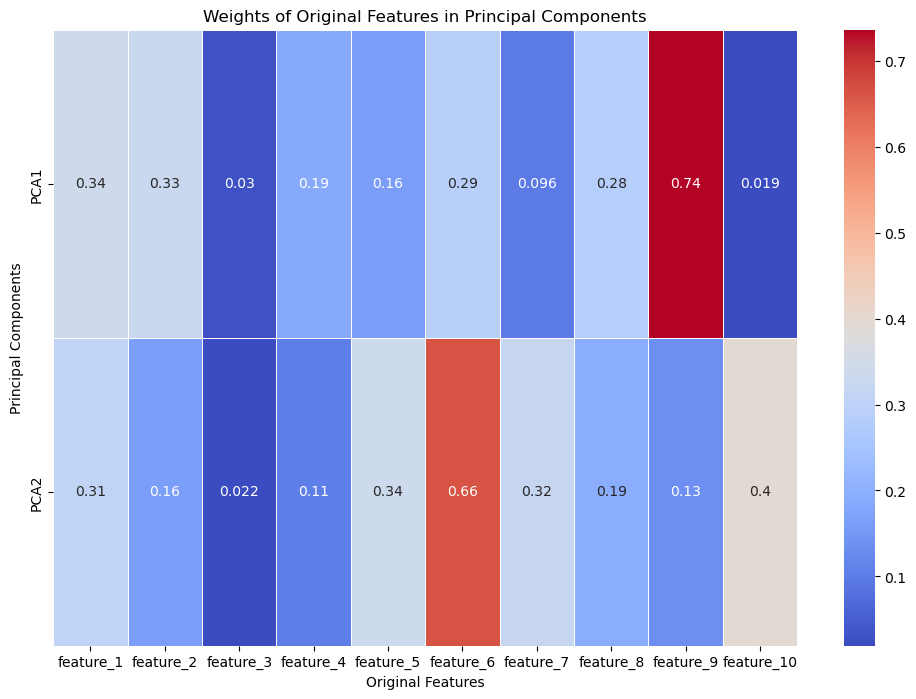

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the heatmap
# sns.set(style="whitegrid")

# Create a heatmap of the PCA weights
plt.figure(figsize=(12, 8))
sns.heatmap(pca_weights_df, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Weights of Original Features in Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

## Part 2: Using the `customers_pca_df` Dataframe, utilize the elbow method to determine the optimal value of k.

In [12]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [13]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(customer_pca_df)
    inertia.append(k_model.inertia_)

In [14]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data

df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,49585.714978
1,2,23750.955470
2,3,8773.172935
3,4,6840.237425
4,5,5378.897735


In [15]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Part 3: Segment the `customers_pca_df` DataFrame using the K-means algorithm.

In [16]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(customer_pca_df)

# Make predictions
k_3 = model.predict(customer_pca_df)

# Create a copy of the customers_pca_df DataFrame
customer_pca_predictions_df = customer_pca_df.copy()

# Add a class column with the labels
customer_pca_predictions_df["customer_segments"] = k_3

In [17]:
# Plot the clusters
# Plot the clusters
customer_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [PCA1]   (PCA2)

## Part 4: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm

In [18]:
# Define the model Kmeans model using k=3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(customers_transformed_df)

# Make predictions
k_3 = model.predict(customers_transformed_df)

# Create a copy of the customers_transformed_df DataFrame
customers_transformed_predictions_df = customers_transformed_df.copy()

# Add a class column with the labels
customers_transformed_predictions_df["customer_segments"] = k_3

In [19]:
# Plot the clusters using the age and spending columns
customers_transformed_predictions_df.hvplot.scatter(
    x="feature_1",
    y="feature_2",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [feature_1]   (feature_2)

## Part 5: Compare the segmentation results between the PCA DataFrame and the full-factored DataFrame

**Answer:** YOUR ANSWER HERE